## Combining data gathered using ampify API

In [2]:
import pandas as pd
import re

df_analyst = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Github\Job_Trend_Analysis\datasets\job_listings_data_analyst.csv')
df_engineer = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Github\Job_Trend_Analysis\datasets\job_listings_data_engineer.csv')
df_scientist = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Github\Job_Trend_Analysis\datasets\job_listings_data_scientist.csv')

df_analyst['job_category'] = 'Data Analyst'
df_engineer['job_category'] = 'Data Engineer'
df_scientist['job_category'] = 'Data Scientist'

combined_df = pd.concat([df_analyst, df_engineer, df_scientist], ignore_index=True)

combined_df.to_csv(r'C:\Users\shiva\OneDrive\Documents\Github\Job_Trend_Analysis\datasets\combined_job_listings.csv', index=False)
print("Combined data saved to 'C:\\Users\\shiva\\OneDrive\\Documents\\Github\\Job_Trend_Analysis\\datasets\\combined_job_listings.csv'")


Combined data saved to 'C:\Users\shiva\OneDrive\Documents\Github\Job_Trend_Analysis\datasets\combined_job_listings.csv'


## Data Cleaning

In [3]:
df = pd.read_csv('datasets/combined_job_listings.csv')

def categorize_job_title(title):
    title = title.lower()
    if re.search(r'\bdata\s+scientist\b', title):
        return 'Data Scientist'
    elif re.search(r'\bdata\s+engineer\b', title):
        return 'Data Engineer'
    elif re.search(r'\bdata\s+analyst\b', title):
        return 'Data Analyst'
    else:
        return 'Data Scientist' 

df['job_category'] = df['title'].apply(categorize_job_title)

df = df[df['job_category'] != 'Other']



In [4]:
df['job_category'].unique()

array(['Data Analyst', 'Data Scientist'], dtype=object)

In [5]:
df['avg_salary'] = df[['min_amount', 'max_amount']].mean(axis=1)

In [6]:
df['avg_salary'].isna().sum()

331

In [7]:
df.head()

,company,currency,date_posted,description,emails,interval,is_remote,job_function,job_level,job_type,job_url,job_url_direct,listing_type,location,max_amount,min_amount,title,job_category,avg_salary
0,843045256,NaN,1.738368e+12,Benefits:\r\n• 401(k)\r\n• 401(k) matching\r\n...,NaN,NaN,False,NaN,NaN,fulltime,https://www.indeed.com/viewjob?jk=a710335d092d...,NaN,NaN,"Pomona, CA",NaN,NaN,Data Analyst,Data Analyst,NaN
1,Sunbit,NaN,1.738368e+12,JOB TITLE: Fraud Data Analyst\r\n\r\nLOCATION:...,NaN,NaN,True,NaN,NaN,fulltime,https://www.linkedin.com/jobs/view/fraud-data-...,NaN,NaN,"Los Angeles, CA",NaN,NaN,Fraud Data Analyst,Data Analyst,NaN
2,SynergisticIT,NaN,1.738368e+12,Are you passionate about coding or technology ...,NaN,NaN,False,NaN,NaN,fulltime,https://www.linkedin.com/jobs/view/python-prog...,NaN,NaN,"Las Vegas, NV",NaN,NaN,Python Programmer (Remote)/ Data Analyst (Remote),Data Analyst,NaN
3,University Medical Center of Southern Nevada,NaN,1.738368e+12,EMPLOYER-PAID PENSION PLAN (NEVADA PERS)\r\nCO...,NaN,NaN,True,NaN,NaN,fulltime,https://www.governmentjobs.com/careers/umcsn/j...,NaN,NaN,"Las Vegas, NV",NaN,NaN,Epic Analyst - Core Clinical,Data Scientist,NaN
4,Zest AI,NaN,1.738282e+12,"At Zest AI, we excel at tackling complex chall...",NaN,NaN,False,NaN,NaN,fulltime,https://www.linkedin.com/jobs/view/data-analys...,NaN,NaN,"Burbank, CA",NaN,NaN,Data Analyst,Data Analyst,NaN


In [8]:
df.shape[0]

403

In [9]:
columns_to_remove = [
    'currency','date_posted', 'description', 'emails', 'interval', 'is_remote', 'job_function', 'job_level', 'job_type', 'job_url', 'job_url_direct',
    'listing_type', 'max_amount', 'min_amount'
]

df = df.drop(columns=columns_to_remove)

In [10]:
df.to_csv('datasets/combined_job_listings_cleaned.csv', index=False)
print("Cleaned data saved to 'datasets/combined_job_listings_cleaned.csv'")

Cleaned data saved to 'datasets/combined_job_listings_cleaned.csv'


## Cleaning Kaggle API Dataset

In [11]:

df_new = pd.read_csv('datasets/Glassdoor_Salary_Cleaned_Version.csv') 

def categorize_job_title(title):
    title = title.lower()
    if re.search(r'data\s+scientist', title):
        return 'Data Scientist'
    elif re.search(r'data\s+engineer', title):
        return 'Data Engineer'
    elif re.search(r'data\s+analyst', title):
        return 'Data Analyst'
    else:
        return 'Data Scientist'  

df_new['job_category'] = df_new['Job Title'].apply(categorize_job_title)

df_new = df_new[df_new['job_category'] != 'Other']



columns_to_remove = [
    'Salary Estimate', 'Job Description', 'Rating', 'Headquarters', 'Size', 'Founded',
    'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
    'employer_provided', 'min_salary', 'max_salary', 'company_txt', 'job_state',
    'same_state', 'age'
]

df_new = df_new.drop(columns=columns_to_remove)

df_new.to_csv('datasets/Glassdoor_Salary_Cleaned_Version_Reduced.csv', index=False)
print("Updated data saved to 'datasets/Glassdoor_Salary_Cleaned_Version_Reduced.csv'")



Updated data saved to 'datasets/Glassdoor_Salary_Cleaned_Version_Reduced.csv'


## Combining Data from kaggle api and apify api

In [12]:
df_job_listings = pd.read_csv('datasets/combined_job_listings_cleaned.csv')
df_glassdoor_salary = pd.read_csv('datasets/Glassdoor_Salary_Cleaned_Version_Reduced.csv')

df_job_listings.rename(columns={'company': 'Company Name', 'location': 'Location', 'title': 'Job Title'}, inplace=True)

df_job_listings['Company Name'] = df_job_listings['Company Name'].str.strip().str.lower()
df_glassdoor_salary['Company Name'] = df_glassdoor_salary['Company Name'].str.strip().str.lower()

df_job_listings['Location'] = df_job_listings['Location'].str.strip().str.lower()
df_glassdoor_salary['Location'] = df_glassdoor_salary['Location'].str.strip().str.lower()

df_job_listings['Job Title'] = df_job_listings['Job Title'].str.strip().str.lower()
df_glassdoor_salary['Job Title'] = df_glassdoor_salary['Job Title'].str.strip().str.lower()

df_final = pd.merge(df_job_listings, df_glassdoor_salary, 
                              on=['Job Title', 'Company Name', 'Location', 'job_category'], 
                              how='outer')

df_final.to_csv('datasets/combined_final_data.csv', index=False)
print("Complete merged data saved to 'datasets/combined_final_data.csv'")


Complete merged data saved to 'datasets/combined_final_data.csv'


## Visualization of Uncleaned Data

### visualization of Job Title Before Converting into Category

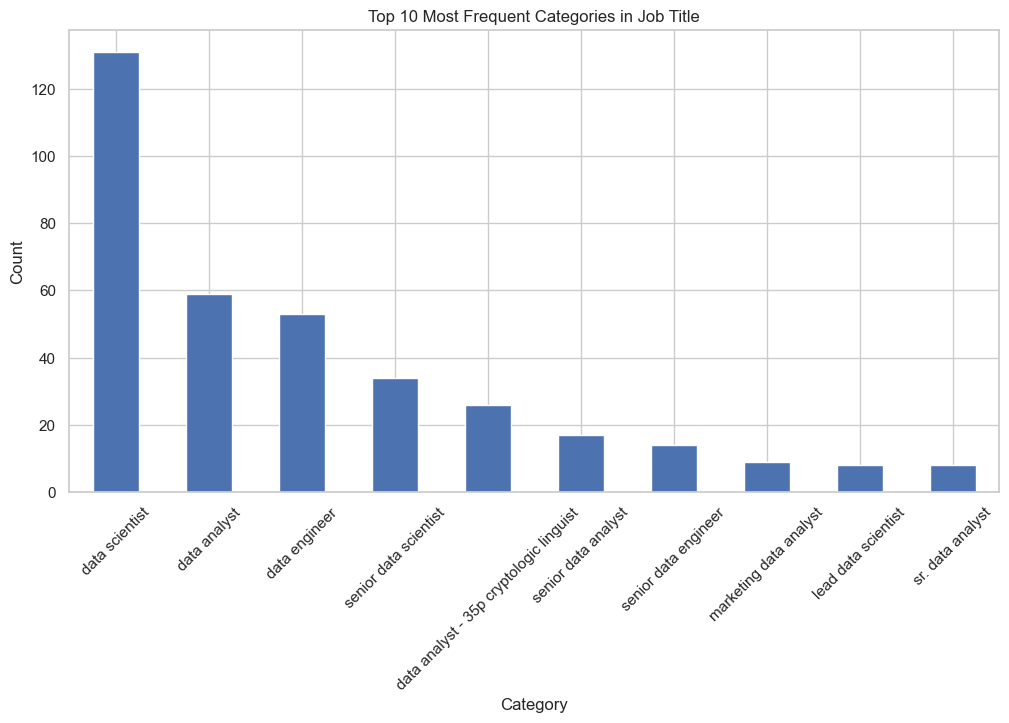

In [13]:
categorical_cols = ['Job Title']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    # Calculate value counts and limit to top 10
    top_categories = df_final[col].value_counts().head(10)
    top_categories.plot(kind='bar')
    plt.title(f'Top 10 Most Frequent Categories in {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Identifying Missing Values in Each Column

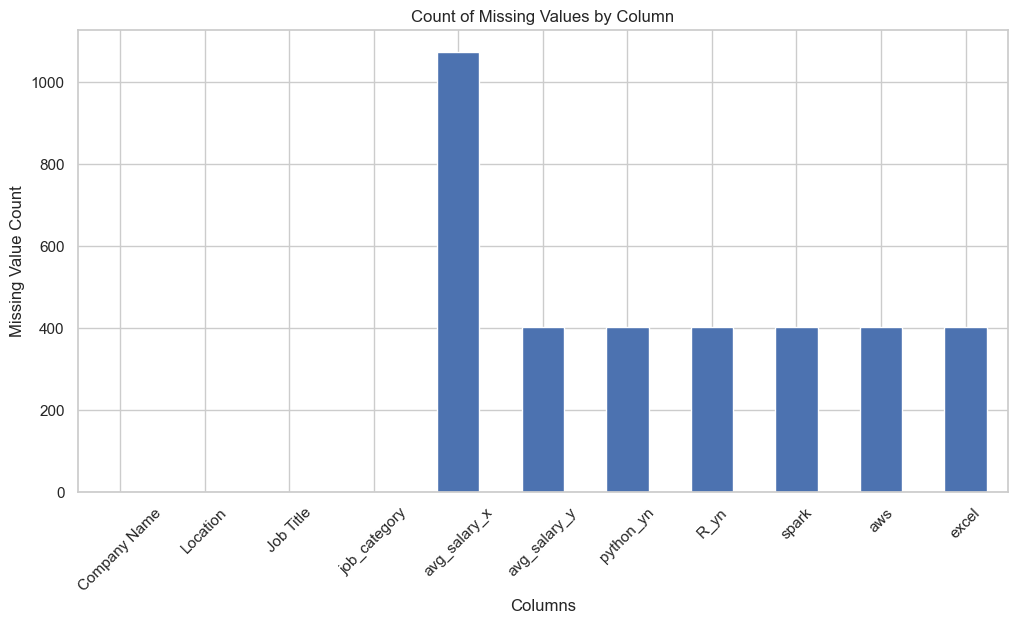

In [14]:
missing_counts = df_final.isnull().sum()
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar')
plt.title('Count of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Heatmap of Missing Data 

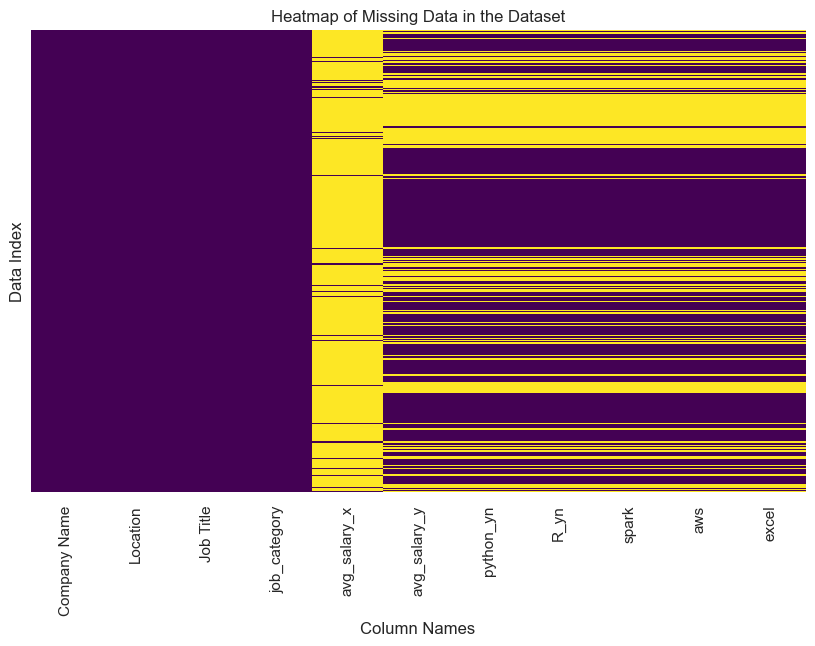

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_final.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Data in the Dataset')
plt.xlabel('Column Names')
plt.ylabel('Data Index')
plt.show()

### Distribution of Numerical Columns

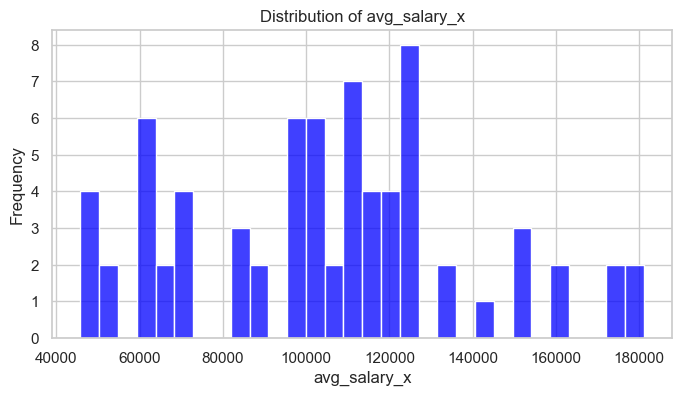

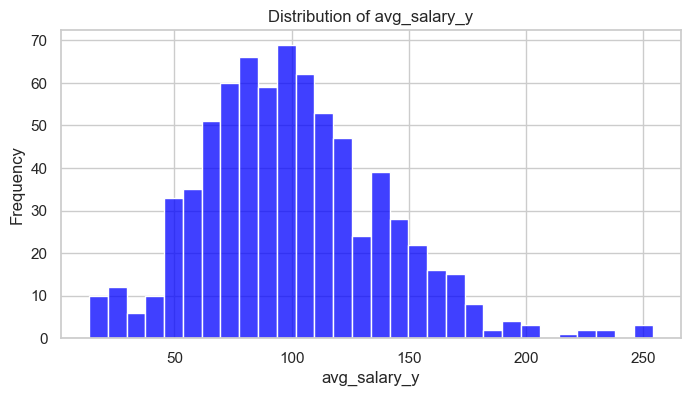

In [31]:
numerical_cols = ['avg_salary_x', 'avg_salary_y']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_final[col].dropna(), kde=False, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Cleaning the final Combined Data

In [18]:
import pandas as pd

df = pd.read_csv('datasets/combined_final_data.csv')

df.loc[df['avg_salary_y'].notna(), 'avg_salary_y'] = df['avg_salary_y'] * 2080

df['avg_salary'] = df['avg_salary_x'].fillna(df['avg_salary_y'])

df.drop(['avg_salary_x', 'avg_salary_y'], axis=1, inplace=True)


In [19]:
df.head()

,Company Name,Location,Job Title,job_category,python_yn,R_yn,spark,aws,excel,avg_salary
0,disability solutions,"glendale, ca",advanced data analyst,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN
1,disability solutions,"glendale, ca",advanced data analyst,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN
2,belmont university,"nashville, tn",advancement services - temporary data analyst,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN
3,belmont university,"nashville, tn",advancement services – temporary data analyst,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN
4,beck's hybrids\n4.6,"atlanta, in",ag data scientist,Data Scientist,0.0,0.0,0.0,0.0,0.0,167440.0


In [20]:
df['avg_salary'].isna().sum()

331

In [21]:
df.describe()

,python_yn,R_yn,spark,aws,excel,avg_salary
count,742.000000,742.000000,742.000000,742.000000,742.000000,814.000000
mean,0.528302,0.002695,0.225067,0.237197,0.522911,200046.097666
std,0.499535,0.051882,0.417908,0.425651,0.499812,83301.462104
min,0.000000,0.000000,0.000000,0.000000,0.000000,28080.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,138580.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,192400.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,249600.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,528320.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1145 non-null   object 
 1   Location      1145 non-null   object 
 2   Job Title     1145 non-null   object 
 3   job_category  1145 non-null   object 
 4   python_yn     742 non-null    float64
 5   R_yn          742 non-null    float64
 6   spark         742 non-null    float64
 7   aws           742 non-null    float64
 8   excel         742 non-null    float64
 9   avg_salary    814 non-null    float64
dtypes: float64(6), object(4)
memory usage: 89.6+ KB


## Handling the missing values

In [23]:
df['job_category'] = df['job_category'].str.strip()

categorical_columns = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
for column in categorical_columns:
    df[column] = df.groupby('job_category')[column].transform(lambda x: x.fillna(x.mode()[0]))

df['avg_salary'] = df.groupby('job_category')['avg_salary'].transform(lambda x: x.fillna(x.median()))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1145 non-null   object 
 1   Location      1145 non-null   object 
 2   Job Title     1145 non-null   object 
 3   job_category  1145 non-null   object 
 4   python_yn     1145 non-null   float64
 5   R_yn          1145 non-null   float64
 6   spark         1145 non-null   float64
 7   aws           1145 non-null   float64
 8   excel         1145 non-null   float64
 9   avg_salary    1145 non-null   float64
dtypes: float64(6), object(4)
memory usage: 89.6+ KB


In [25]:
df.to_csv('datasets/final_cleaned_data.csv', index=False)
print("Complete merged data saved to 'datasets/final_cleaned_data.csv'")

Complete merged data saved to 'datasets/final_cleaned_data.csv'


## Visualization of Cleaned Data

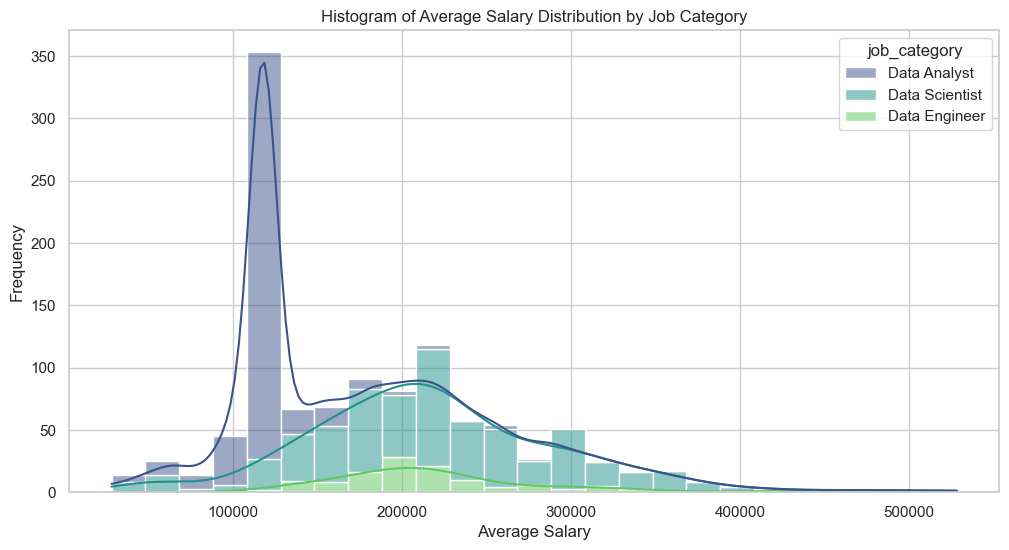

In [26]:

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='avg_salary', hue='job_category', multiple='stack', palette='viridis', kde=True)

plt.title('Histogram of Average Salary Distribution by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')

plt.show()


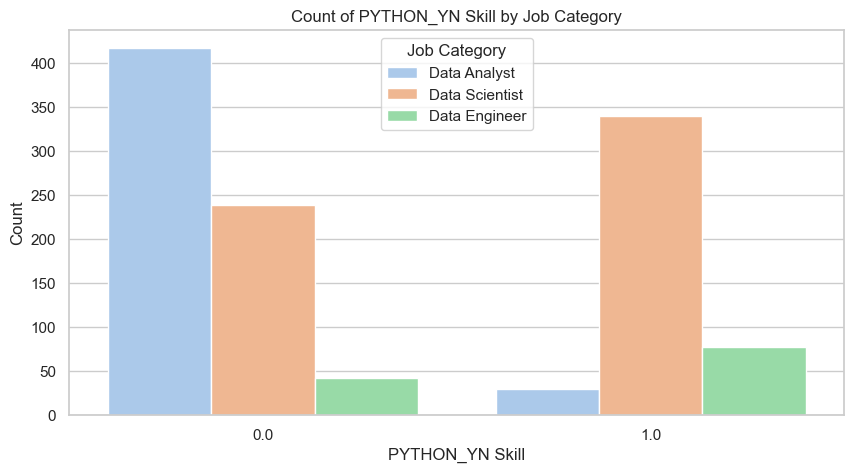

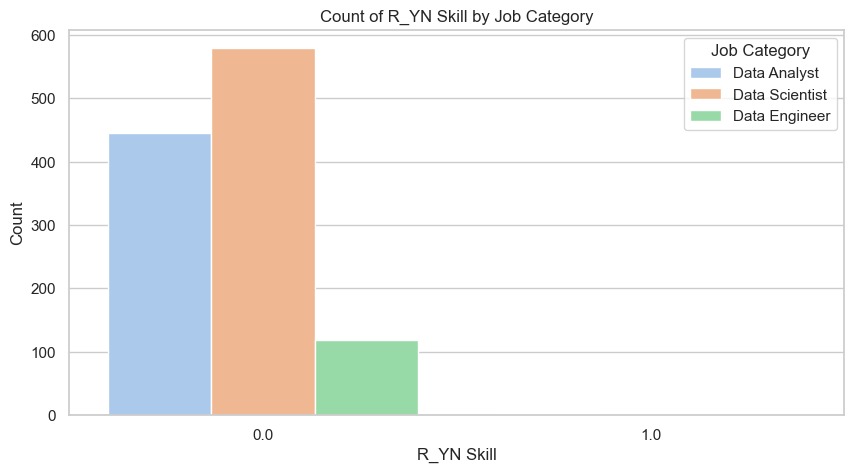

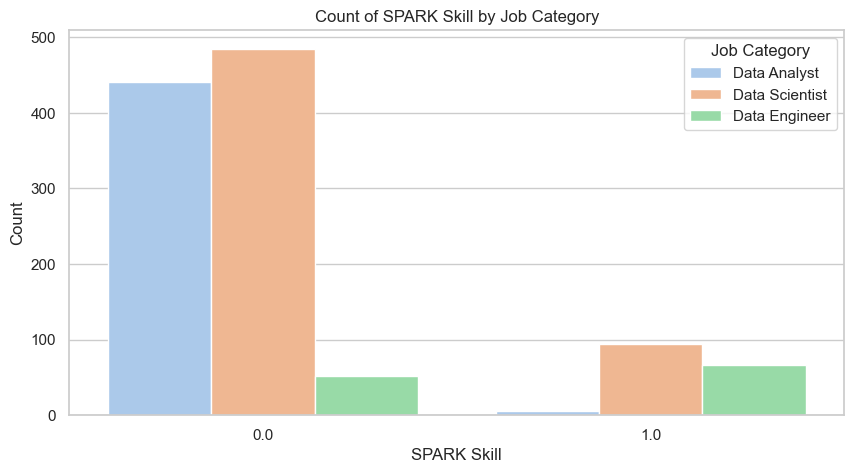

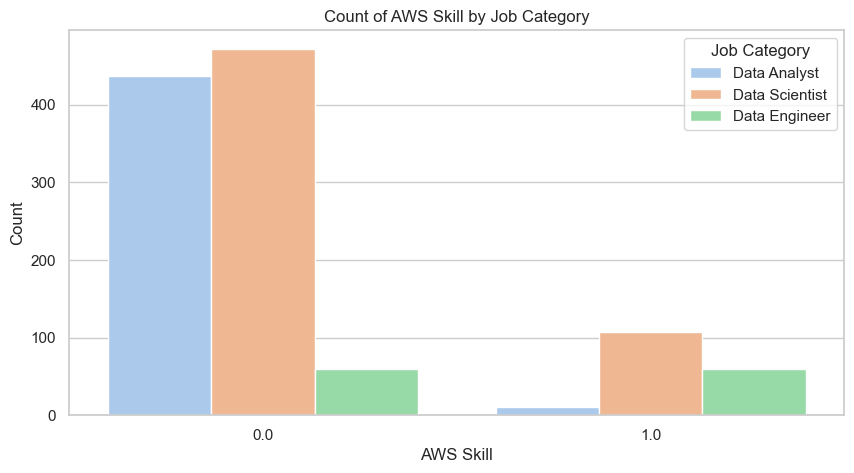

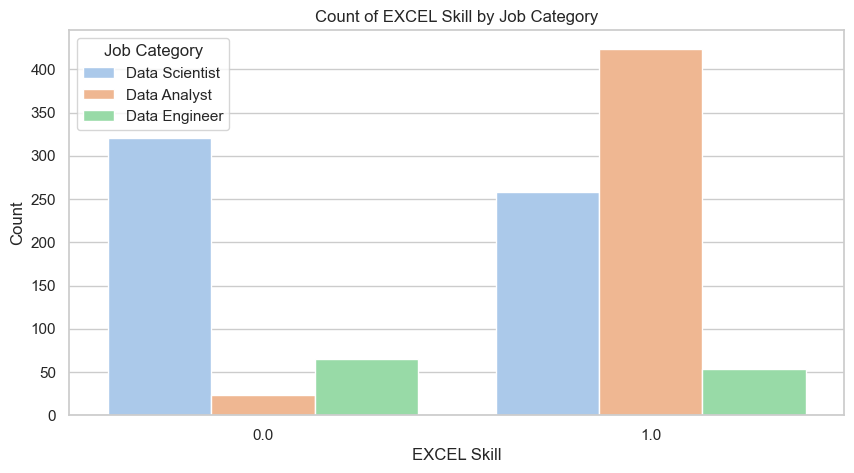

In [27]:
skills_columns = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
if all(col in df.columns for col in skills_columns):
    for skill in skills_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=skill, data=df, hue='job_category', palette='pastel')
        plt.title(f'Count of {skill.upper()} Skill by Job Category')
        plt.xlabel(f'{skill.upper()} Skill')
        plt.ylabel('Count')
        plt.legend(title='Job Category')
        plt.show()


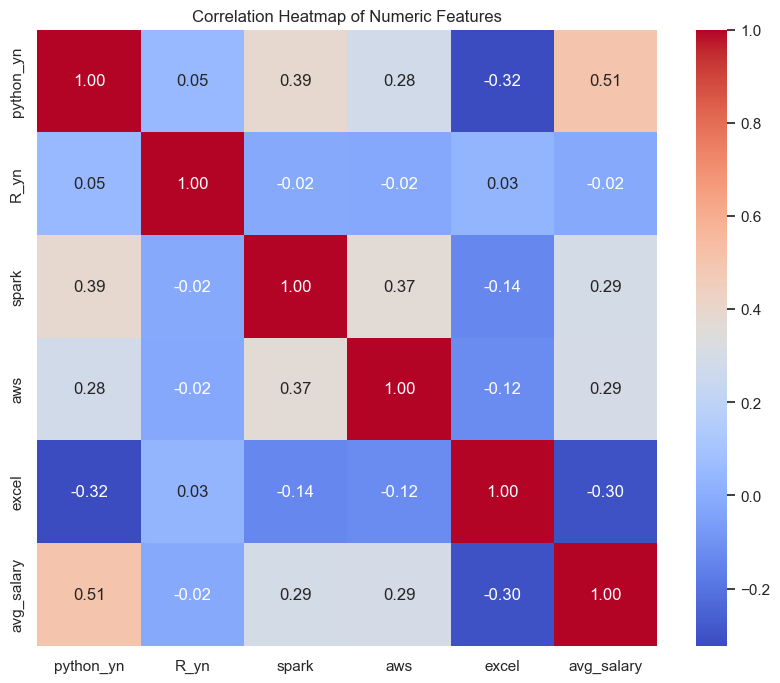

In [28]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
